<a href="https://colab.research.google.com/github/devayache/AluraVoz/blob/main/AluraVoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura Voz - Taxa de Churn


![Alura Voz](https://raw.githubusercontent.com/devayache/AluraVoz/main/68747470733a2f2f692e696d6775722e636f6d2f6a6e376b6d386f2e706e67.png)

## O que é a Taxa de Churn?

Para todas as empresa o fundamental é aumentar o seu número de clientes, por isso dizem que a propaganda é a alma do negócio, porém muitas vezes a empresa não se atenta a manter os clientes que já tem. Evitar os cancelamentos é tão importante quanto capitar novos clientes. Sendo assim uma das métricas usadas para medir o nível de cancelamento de uma empresa é a taxa de Churn, essa taxa é medida sempre em um determinado período, sendo assim basta dividir a quantidade de clientes que cancelaram no período pela quantidade de clientes que havia iniciado neste período.

## $$ \text{Taxa de Churn} =  \frac{\text{Quantidade de cancelamento no Período}}{\text{Total de clientes no Período}}$$

Assim pode-se concluir que o aumento do faturamento está ligado diretamente a uma taxa baixa de Churn, uma taxa de Churn considerada boa deve ficar abaixo do 10%, claro que quanto menor melhor. 
Mas e como fazer esta taxa baixar ? Bem, para isso é preciso de um estudo mais detalhado dos clientes, observar como eles estão reagindo e tentar prever um perfil para os possíveis cancelamentos.
O banco da dados a seguir vem de uma API e tem seu formato Json, para isso então será utilizada algumas técnicas de organização dos dados para que se possa ter uma melhor ideia dos dados.


# Carregandos dados

In [1]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# configurações inicias
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [3]:
clientes = pd.read_json('https://raw.githubusercontent.com/devayache/AluraVoz/main/Telco-Customer-Churn.json')
clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}","{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}"
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}"
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 73.9, 'Total': '280.85'}}"
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 98.0, 'Total': '1237.85'}}"
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 83.9, 'Total': '267.4'}}"


Como dito anteriormente os dados estão em um formato Json o que necessita de uma atenção especial para o tratamento dos mesmo, tendo em vista que o DataFrame inicial é possível observar que as colunas trazem mais informações, ou seja, trazem outras variáveis a serem estudas, para isso então é preciso “explodir” cada uma das colunas para se ter uma melhor visão dos dados.

In [4]:
# Normalizando as colunas
clientes_informacoes = pd.json_normalize(clientes['customer'])
clientes_telefone = pd.json_normalize(clientes['phone'])
clientes_internet = pd.json_normalize(clientes['internet'])
clientes_conta = pd.json_normalize(clientes['account'])

In [5]:
# dropando as colunas 
clientes.drop(columns=['customer'],inplace=True)
clientes.drop(columns=['phone'],inplace=True)
clientes.drop(columns=['internet'],inplace=True)
clientes.drop(columns=['account'],inplace=True)

In [6]:
print(f"Total de clientes fornecidos na tabela: {clientes.shape[0]}")

Total de clientes fornecidos na tabela: 7267


# Analisado as colunas separadamente

Aqui as novas colunas geradas serão analisadas separadamente, começando pela colunas gerada pela antiga coluna `customer`

## Variaveis da coluna `customer`

In [7]:
clientes_informacoes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


### Dicionário da coluna `customer`.
Seque o dicionário da coluna `customer`. Para um processo de tradução ela será chamada de `informações`, pois é justamente isso que traz dos usuários.

\
`gender`: gênero (masculino e feminino)

`SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
`Partner`: se o cliente possui ou não um parceiro ou parceira

`Dependents`: se o cliente possui ou não dependentes

`tenure`: meses de contrato do cliente


In [8]:
clientes_informacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


### Tipos de variáveis

* Variáveis categóricas:
  * `gender`
  * `SeniorCitizen`
  * `Partner`
  * `Dependents`
* Variáveis quantitativa:
  * `ternure`


\
Observação: Apesar de a variável `SeniorCitizen` aparecer como inteira nas informações ela simplesmente informa se o clientes possui mais de 65 anos ou não, ou seja, dando uma característica ao cliente e por isso ela será tratada como uma variável categórica.



### Verificando as informações em cada coluna

In [9]:
clientes_informacoes['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
clientes_informacoes['SeniorCitizen'].unique()

array([0, 1])

In [11]:
clientes_informacoes['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
clientes_informacoes['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
clientes_informacoes['tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

Ao observar os valores de cada uma das colunas que trazem as informações dos clientes verifica-se que, as variáveis estão de acordo com que se é esperado, porém é preciso fazer uma ressalva para o valor `0`, que se encontra na variável `tenure`, pois ele pode se tratar de uma inconsistência ou somente de novos clientes com menos de um mês de contrato vigente, contudo esses dados serão mais facilmente analisados quando as tabelas forem juntas pois assim se poderá ter uma noção com os valores totais gastos por esses clientes.


## Variaveis da coluna `Phone`

In [14]:
clientes_telefone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


### Dicionário da coluna `phone	`.

Seque o dicionário da coluna `phone`. Para um processo de tradução ela será chamada de `telefone`, pois é justamente disso que se trat.

\
`PhoneService`: assinatura de serviço telefônico

`MultipleLines`: assinatura de mais de uma linha de telefone


In [15]:
clientes_telefone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


### Tipos de variáveis

* Variáveis categóricas:
  * `PhoneService`
  * `MultpleLines`

Aqui ambas as variáveis são categóricas

### Verificando as informações em cada coluna

In [16]:
clientes_telefone['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
clientes_telefone['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

Aqui é preciso fazer uma rápida verificação para ver se não a inconsistências, pois na variável `MultiplesLines` uma das opções é `No phone service` e ela não pode aparecer quando o coluna `PhoneService` for igual a `Yes`.

In [18]:
clientes_telefone[clientes_telefone['MultipleLines'] == 'No phone service'].value_counts()

PhoneService  MultipleLines   
No            No phone service    707
dtype: int64

É possível verificar que 707 clientes não possuem serviço de internet e todos eles têm a opção `No` marcada na coluna `PhoneService`, sendo assim averiguado que não existe esse inconsistência

## Variaveis da coluna `internet`

In [19]:
clientes_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


### Dicionário da coluna `internet`.

Seque o dicionário da coluna `internet`.

\
`InternetService`: assinatura de um provedor internet

`OnlineSecurity`: assinatura adicional de segurança online

`OnlineBackup`: assinatura adicional de backup online

`DeviceProtection`: assinatura adicional de proteção no dispositivo

`TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera

`StreamingTV`: assinatura de TV a cabo

`StreamingMovies`: assinatura de streaming de filmes

In [20]:
clientes_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


### Tipos de variáveis

* Variáveis categóricas:
  * `InternetService`
  * `OnlineSecurity`
  * `OnlineBackup`
  * `DeviceProtection`
  * `TechSupport`
  * `StreamingTV`
  * `StreamingMovies`

Todas as variáveis são categóricas


### Verificando as informações em cada coluna

In [21]:
for i in clientes_internet.columns:
  print(f'{i} ==> {clientes_internet[i].unique()}\n')

InternetService ==> ['DSL' 'Fiber optic' 'No']

OnlineSecurity ==> ['No' 'Yes' 'No internet service']

OnlineBackup ==> ['Yes' 'No' 'No internet service']

DeviceProtection ==> ['No' 'Yes' 'No internet service']

TechSupport ==> ['Yes' 'No' 'No internet service']

StreamingTV ==> ['Yes' 'No' 'No internet service']

StreamingMovies ==> ['No' 'Yes' 'No internet service']



Análoga ao que foi feito no serviço de telefone é preciso verificar se as opções `No internet sevice` aparecem juntamente com opção `Yes` da coluna `InternetSevice`, pois se acontecer uma coluna acaba anulado a outra, já que estas informações são mutuamente exclusivas.

In [22]:
# verificação feita para cada coluna 
print('Total de inconsistências por coluna:\n')
for i in clientes_internet.columns[1:]:
  selecao = (clientes_internet['InternetService'] != 'No') & (clientes_internet[i] == 'No internet service')
  print(f'{i} ==> {clientes[selecao].shape[0]}')

Total de inconsistências por coluna:

OnlineSecurity ==> 0
OnlineBackup ==> 0
DeviceProtection ==> 0
TechSupport ==> 0
StreamingTV ==> 0
StreamingMovies ==> 0


## Variaveis da coluna `account`

In [23]:
clientes_conta.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


### Dicionário da coluna `account`.

Seque o dicionário da coluna `account`.

\
`Contract`: tipo de contrato

`PaperlessBilling`: se o cliente prefere receber online a fatura

`PaymentMethod`: forma de pagamento

`Charges.Monthly`: total de todos os serviços do cliente por mês

`Charges.Total`: total gasto pelo cliente

In [24]:
clientes_conta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


### Tipos de variáveis

* Variáveis categóricas:
  * `Contract`
  * `PaperlessBilling`
  * `PaymentMethod`

\
* Variáveis quantitativas:
  * `Charges.Monthly`
  * `Charges.Total`

A coluna `Charges.Total` está como object, porém ela se trata do acumulado pago pelo cliente por isso será classificada com uma variável quantitativa e o seus valores serão tratados para passar para o tipo correto, que nesse caso será float.



### Verificando as informações em cada coluna

In [25]:
for i in clientes_conta.columns:
  print(f'{i} ==> {clientes_conta[i].unique()}\n')

Contract ==> ['One year' 'Month-to-month' 'Two year']

PaperlessBilling ==> ['Yes' 'No']

PaymentMethod ==> ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Charges.Monthly ==> [65.6  59.9  73.9  ... 91.75 68.8  67.85]

Charges.Total ==> ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']



Comprovando que coluna `Charges.Total` mostra valores do tipo float.

Já as demais colunas não apresentam inconsistência

In [26]:
clientes_conta['Charges.Total'].value_counts()

           11
20.2       11
19.75       9
19.55       9
19.9        9
           ..
272         1
1426.45     1
371.6       1
6786.4      1
3707.6      1
Name: Charges.Total, Length: 6531, dtype: int64

É possivel constatar que existem alguns valores vázios, esses valores podem estar ligados a um dos valores visto anteriormente, o valor de `ternure`, pois estes valores vazios podem estar ligados aos clientes que ainda não completaram um mês. E para isso é preciso organizar todas as colunas para uma melhor analise.

# Junção das colunas

In [27]:
# juntando as colunas
clientes = pd.concat([clientes, clientes_informacoes, clientes_telefone, clientes_internet, clientes_conta], axis=1)
clientes_backup = clientes.copy()
clientes.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Verificando a inconsisência da coluna `Charges.Total`

Agora com as colunas todas juntas é possível realizar uma melhor análise sobre os valores que se encontram vazios na coluna `Charnges.Total`, para isso será feita uma filtragem para que se possa entender melhor está situação.

In [28]:
# filtro ternure e Charges.Total vazio
selecao = (clientes['tenure'] == 0) & (clientes['Charges.Total'] == ' ')
clientes[selecao][['customerID', 'Churn' ,'tenure','Charges.Monthly' ,'Charges.Total']]

,customerID,Churn,tenure,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,0,56.05,
1775,2520-SGTTA,No,0,20.00,
1955,2775-SEFEE,No,0,61.90,
2075,2923-ARZLG,No,0,19.70,
2232,3115-CZMZD,No,0,20.25,
2308,3213-VVOLG,No,0,25.35,
2930,4075-WKNIU,No,0,73.35,
3134,4367-NUYAO,No,0,25.75,
3203,4472-LVYGI,No,0,52.55,
4169,5709-LVOEQ,No,0,80.85,


In [29]:
print(f'Existem {clientes[selecao].shape[0]} nessa situação')

Existem 11 nessa situação


É possível observar que todos os 11 clientes são clientes novos pois todos eles têm na coluna `tenure` o valor zero, ou seja, não tem um mês completo como cliente, para não retirar esses clientes da base dadados os campos vazios da coluna `Charges.Total` será preenchido com os valores da coluna `Chardes.Monthly`, tendo em vista que esse será o gasto total pago após o seu primeiro mês de contrato.

In [30]:
clientes.loc[selecao, 'Charges.Total'] = clientes['Charges.Monthly']

In [31]:
clientes[clientes['tenure'] == 0][['customerID', 'Churn' ,'tenure','Charges.Monthly' ,'Charges.Total']]

,customerID,Churn,tenure,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,0,56.05,56.05
1775,2520-SGTTA,No,0,20.00,20.0
1955,2775-SEFEE,No,0,61.90,61.9
2075,2923-ARZLG,No,0,19.70,19.7
2232,3115-CZMZD,No,0,20.25,20.25
2308,3213-VVOLG,No,0,25.35,25.35
2930,4075-WKNIU,No,0,73.35,73.35
3134,4367-NUYAO,No,0,25.75,25.75
3203,4472-LVYGI,No,0,52.55,52.55
4169,5709-LVOEQ,No,0,80.85,80.85


In [32]:
clientes['Charges.Total'] = pd.to_numeric(clientes['Charges.Total'])

In [33]:
clientes['Charges.Total'].dtype

dtype('float64')

# Verificando a inconsisência da coluna `Churn`

A coluna onde se encontram os valores de Churn é uma coluna muito importante para a análise destes dados e para o objetivo dessa pesquisa, sendo dando uma olhada novamente nos valores desta colunas se tem:

In [34]:
clientes['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

É possível ver que essa colunas tem alguns valores vazios, porem ainda sim são uma string, esses valores não acrescentam valor a análise que estamos fazendo, sendo assim eles serão retirados do DataFrame.

Só que para facilitar este processo será feita a tradução de todo o DataFrame e esses valores vazios serão transformados em valores nulos o que facilitara a retirada deles do DataFrame.


In [35]:
clientes[clientes['Churn'] == ''].shape[0]

224

Serão retirados 224 clientes que não tem seus valores de `Churn` informados

In [36]:
# traduzindo somente a colunas de Churn
clientes['Churn'] = clientes['Churn'].map({'No':'Não', 'Yes' : 'Sim' })
clientes['Churn']

0       Não
1       Não
2       Sim
3       Sim
4       Sim
       ... 
7262    Não
7263    Sim
7264    Não
7265    Não
7266    Não
Name: Churn, Length: 7267, dtype: object

In [37]:
# verificando as unicidades
clientes['Churn'].unique()

array(['Não', 'Sim', nan], dtype=object)

In [38]:
# dropando as valores nulos
clientes.dropna(subset=['Churn'], inplace=True)

In [39]:
clientes['Churn']

0       Não
1       Não
2       Sim
3       Sim
4       Sim
       ... 
7262    Não
7263    Sim
7264    Não
7265    Não
7266    Não
Name: Churn, Length: 7043, dtype: object

In [40]:
clientes.shape[0]

7043

# Tradução

In [41]:
# dicionário com as traduções

colunas ={
    'customerID': 'IDcustomizado',
    'gender' : 'gênero',
    'SeniorCitizen':'sênior',
    'Partner':'cônjuge',
    'Dependents':'dependentes',
    'tenure':'permanência',
    'PhoneService' : 'ServicoTelefone',
    'MultipleLines' : 'MultiplasLinhas',
    'InternetService': 'ServicoInternet',
    'OnlineSecurity' : 'SeguroOnline',
    'OnlineBackup' : 'BackupOnline',
    'DeviceProtection': 'ProtecaoDoDispositivo',
    'TechSupport' : 'SuporteTecnico',
    'StreamingMovies': 'StreamingFilmes',
    'Contract':'contrato',
    'PaperlessBilling':'FaturaSemPapel',
    'PaymentMethod' : 'MetodoPagamento',
    'Charges.Monthly' : 'GastoMensal',
    'Charges.Total' : 'GastoTotal'
}

valores = {
    'Female': 'Mulher', 
    'Male': 'Homem',
    'Yes': 'Sim', 
    'No': 'Não', 
    'No phone service' : 'Sem Serviço de telefone', 
    'Fiber optic' : 'Fibra Optica',
    'No internet service' : 'Sem Serviço de internet',
    'One year': 'Um ano', 
    'Month-to-month': 'Mensal', 
    'Two year' : 'Dois anos',
    'Mailed check': 'Cheque por Correio', 
    'Electronic check': 'Cheque eletronico', 
    'Credit card (automatic)': 'Cartao de credito',
    'Bank transfer (automatic)': 'Transferencia bancaria'
}


In [42]:
# aplicação da tradução
clientes.rename(columns = colunas,inplace=True)
clientes.replace(to_replace=valores, inplace=True)
clientes.head()

,IDcustomizado,Churn,gênero,sênior,cônjuge,dependentes,permanência,ServicoTelefone,MultiplasLinhas,ServicoInternet,SeguroOnline,BackupOnline,ProtecaoDoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,contrato,FaturaSemPapel,MetodoPagamento,GastoMensal,GastoTotal
0,0002-ORFBO,Não,Mulher,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Um ano,Sim,Cheque por Correio,65.6,593.30
1,0003-MKNFE,Não,Homem,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque por Correio,59.9,542.40
2,0004-TLHLJ,Sim,Homem,0,Não,Não,4,Sim,Não,Fibra Optica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletronico,73.9,280.85
3,0011-IGKFF,Sim,Homem,1,Sim,Não,13,Sim,Não,Fibra Optica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletronico,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,1,Sim,Não,3,Sim,Não,Fibra Optica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque por Correio,83.9,267.40


## Dicionário traduzido
`IDcustomizado`: número de identificação único de cada cliente

`Churn`: se o cliente deixou ou não a empresa

`gênero`: gênero (masculino e feminino)

`sênior`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

`cônjuge`:se o cliente possui ou não um parceiro ou parceira

`dependentes`: se o cliente possui ou não dependentes

`permanência`: meses de contrato do cliente

`ServicoTelefone`: assinatura de serviço telefônico

`MultiplasLinhas`: assisnatura de mais de uma linha de telefone

`ServicoInternet`: assinatura de um provedor internet

`SeguroOnline`: assinatura adicional de segurança online

`BackupOnline`: assinatura adicional de backup online

`ProtecaoDoDispositivo`: assinatura adicional de proteção no dispositivo

`SuporteTecnico`: assinatura adicional de suporte técnico, menos tempo de espera

`StreamingTV`: assinatura de TV a cabo

`StreamingFilmes`: assinatura de streaming de filmes

`contrato`: tipo de contrato

`FaturaSemPapel`: se o cliente prefere receber online a fatura

`MetodoPagamento`: forma de pagamento

`GastoMensal`: total de todos os serviços do cliente por mês

`GastoTotal`: total gasto pelo cliente

# Criando a coluna Gasto Diário

Uma coluna gasto de diários foi criada para se ter mais uma métrica a ser avaliada, pois esses novos valores podem ter alguma influência sobre as decisões tomadas pelos clientes que resolvem cancelar.

In [43]:
# separando as colunas, só para deixar elas em ordem
apoio = clientes[['GastoMensal', 'GastoTotal']]
clientes.drop(columns=['GastoMensal', 'GastoTotal'],inplace=True)

In [44]:
# criando a coluinas gasto diario
clientes['GastoDiario'] = round(apoio['GastoMensal'] /30,2)
# juntando as colunas separadas
clientes = pd.concat([clientes, apoio], axis=1)
clientes.head()

,IDcustomizado,Churn,gênero,sênior,cônjuge,dependentes,permanência,ServicoTelefone,MultiplasLinhas,ServicoInternet,SeguroOnline,BackupOnline,ProtecaoDoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,contrato,FaturaSemPapel,MetodoPagamento,GastoDiario,GastoMensal,GastoTotal
0,0002-ORFBO,Não,Mulher,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Um ano,Sim,Cheque por Correio,2.19,65.6,593.30
1,0003-MKNFE,Não,Homem,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque por Correio,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Homem,0,Não,Não,4,Sim,Não,Fibra Optica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletronico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Homem,1,Sim,Não,13,Sim,Não,Fibra Optica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletronico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,1,Sim,Não,3,Sim,Não,Fibra Optica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque por Correio,2.80,83.9,267.40


In [45]:
print(f'Após todo o tratamento a tabela fornece {clientes.shape[0]} clientes ao todo.')

Após todo o tratamento a tabela fornece 7043 clientes ao todo.


# Analise Estatística

Uma coisa dita anteriormente, mas não calculada até agora foi justamente a taxa de Churn, mas ela não foi calculada antes justamente por que os dados tinham que passar por todo um tratamento e não influenciassem nessa métrica, tanto que pode ser visto que alguns clientes foram retirados da tabela, sendo assim se teria uma taxa de Churn diferente se ela fosse calculada antes.

In [46]:
# descrição dos valores de Churn
clientes[clientes['Churn']=='Sim'].describe().round(2)

,sênior,permanência,GastoDiario,GastoMensal,GastoTotal
count,1869.00,1869.00,1869.00,1869.00,1869.00
mean,0.25,17.98,2.48,74.44,1531.80
std,0.44,19.53,0.82,24.67,1890.82
min,0.00,1.00,0.63,18.85,18.85
25%,0.00,2.00,1.87,56.15,134.50
50%,0.00,10.00,2.66,79.65,703.55
75%,1.00,29.00,3.14,94.20,2331.30
max,1.00,72.00,3.94,118.35,8684.80


In [47]:
# calculo da taixa de Churn
taxa_churn =  (clientes[clientes['Churn'] =="Sim"].shape[0]/clientes.shape[0]*100)
print(f"A taxa de Churn = {taxa_churn:.2f}%")

A taxa de Churn = 26.54%


# $$ \text{Taxa de Churn = } 26,54 \% $$

In [48]:
clientes['Churn'].describe()

count     7043
unique       2
top        Não
freq      5174
Name: Churn, dtype: object

In [49]:
frequencia_churn = clientes.Churn.value_counts()
frequencia_churn

Não    5174
Sim    1869
Name: Churn, dtype: int64

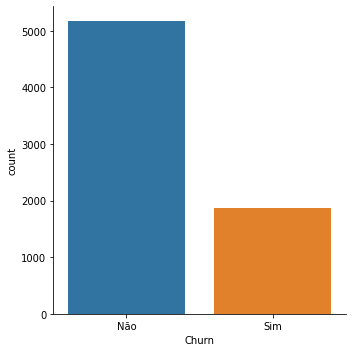

In [50]:
sns.catplot(x='Churn', kind='count',data=clientes)

Mesmo com os observando que os valores são positivos, com 5174 clientes que não cancelaram,  a taxa de Churn é alta, pois os 1869 clientes que fizeram o cancelamento elavam a esta taxa para, aproximadamente, 27%. Com este número é um número bem alto para os padrões e preciso analisar  algumas variáveis juntamente ao Chrun para tentar identificar possíveis ligações entre determinados grupos de clientes que tenham o perfil para fazer cancelamento.


# Analise: Churn x Sênior



A primeira análise a ser feita é a de clientes acima dos 65 anos. A analise geral dos clientes que cancelaram pode ser visto que os clientes acima de 65 anos de idade, tiveram baixa taxa de cancelamento, com apenas 25%, aproximadamente.

In [51]:
# tabela de frequência 
freq_chrun_senior = pd.crosstab(clientes['sênior'], clientes['Churn'])
freq_chrun_senior.rename(index = { 0 : '< 65 anos', 1 :'> 65 anos'}, inplace=True)
freq_chrun_senior

Churn,Não,Sim
sênior,,
< 65 anos,4508,1393
> 65 anos,666,476


In [52]:
senior_sim = freq_chrun_senior['Sim'].loc['> 65 anos']
senior_total = freq_chrun_senior['Sim'].sum()
porcentage_sim_senior = (freq_chrun_senior['Sim'].loc['> 65 anos'] / freq_chrun_senior['Sim'].sum()*100)
print(f'É possível ver um total de {senior_sim} clientes que cancelaram de um total de {senior_total}, o que da uma taxa de Churn entre os idosos de {porcentage_sim_senior:.2f}%')

É possível ver um total de 476 clientes que cancelaram de um total de 1869, o que da uma taxa de Churn entre os idosos de 25.47%


Text(0.5, 1.0, 'Taxa de Churn por Idade')

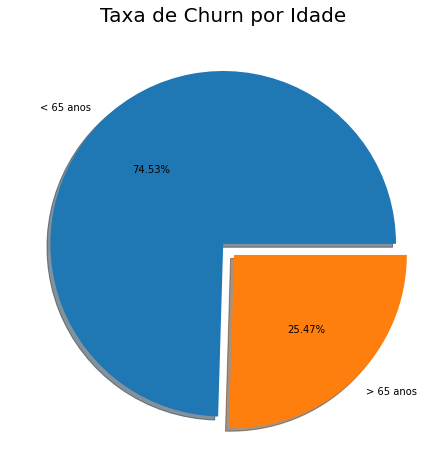

In [53]:
# gráfico da tabela de frequência de sênior 
fig = plt.figure(figsize=(7,6))
eixo = fig.add_axes([0,0,1,1])

explodir =[0,0.09]

eixo.pie(freq_chrun_senior['Sim'], labels=freq_chrun_senior.index,
        autopct='%.2f%%', explode=explodir, shadow=True)
eixo.set_title('Taxa de Churn por Idade', size=20)

##Observação:

Uma observação a ser feita é o porquê a coluna de sênior parece na análise descritiva dos gráfico mesmo sendo uma variável categoria, isso acontece por que as valores de sênior são zeros e um e por isso o pandas trata como uma variável quantitativa, isso é bom por é possível fazer uma contagem mais fácil dos valores de cada uma das opções.


# Analise: Churn x Cônjuge

Outra variável que pode ser comparada e a variável de cônjuges, afinal será quem tem cônjuge resiste mais a cancelar pois precisa manter a comunicação com o seu parceiro ou parceira?


In [54]:
# tabela de frequência 
freq_chrun_conjuge = pd.crosstab(clientes['cônjuge'], clientes['Churn'])
freq_chrun_conjuge

Churn,Não,Sim
cônjuge,,
Não,2441,1200
Sim,2733,669


In [55]:
porc_chrun_conjuges = (pd.crosstab(clientes['cônjuge'], clientes['Churn'], normalize=True)*100).round(2)
porc_chrun_conjuges

Churn,Não,Sim
cônjuge,,
Não,34.66,17.04
Sim,38.80,9.50


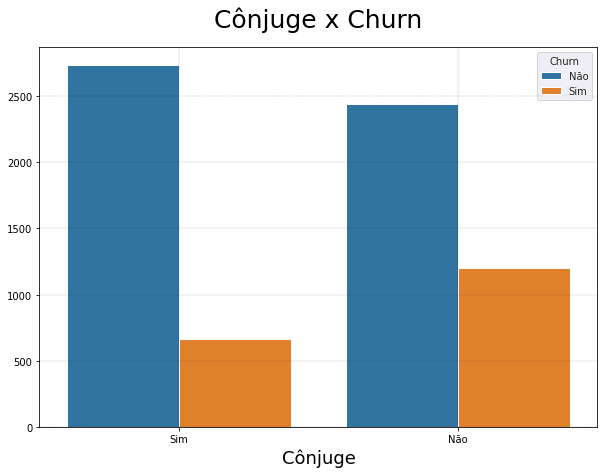

In [56]:
fig, ax = plt.subplots(figsize=(10,7))

# estilo do gráfico
sns.set_style('dark')

# plotagem do gráfico
sns.countplot(x='cônjuge',hue='Churn' ,data=clientes)

# nomes dos eixos 
ax.set_title('Cônjuge x Churn', fontsize=25, pad=20)
ax.set_xlabel('Cônjuge', fontsize=18)
ax.set_ylabel('', fontsize=18)
# grid
ax.grid(True, linestyle='--',linewidth=0.13,color='k')

Aparentemente os clientes que possui cônjuges tem uma taxa de cancelamento menor do que os não possuem.

# Analise: Churn x Dependentes

Análogo a analise feita sobre os cônjuges é bom fazer a análise sobre os 
dependentes pelos memos  pelo menos motivos,  afinal um será quem tem dependentes cancela menos de quem não tem?

In [57]:
# tabela de frequência 
freq_chrun_dependentes = pd.crosstab(clientes['dependentes'], clientes['Churn'])
freq_chrun_dependentes

Churn,Não,Sim
dependentes,,
Não,3390,1543
Sim,1784,326


In [58]:
porc_chrun_dependentes = (pd.crosstab(clientes['dependentes'], clientes['Churn'], normalize=True)*100).round(2)
porc_chrun_dependentes

Churn,Não,Sim
dependentes,,
Não,48.13,21.91
Sim,25.33,4.63


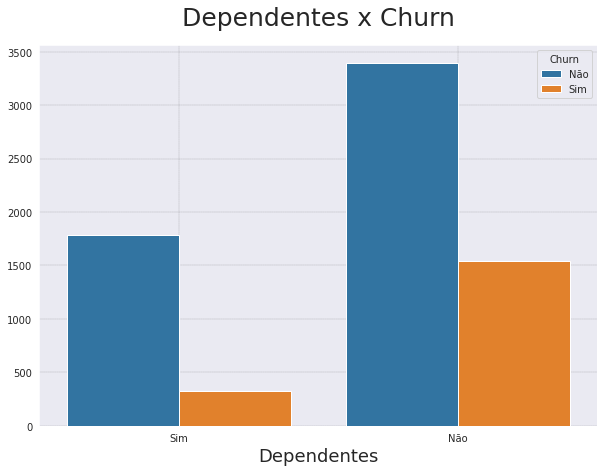

In [59]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set_style('dark')
ax = sns.countplot(x='dependentes', hue='Churn' ,data=clientes, ax=ax)
ax.set_title('Dependentes x Churn', fontsize=25, pad=20)
ax.set_xlabel('Dependentes', fontsize=18)
ax.set_ylabel('', fontsize=18)
ax.grid(True, linestyle='--',linewidth=0.13,color='k')

# Analise: Churn x Permanência

In [60]:
# tabela de frequência 
freq_chrun_permanencia = pd.crosstab(clientes['permanência'], clientes['Churn'])
freq_chrun_permanencia.sort_values(by=['Sim'], ascending=False)

Churn,Não,Sim
permanência,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64
...,...,...
44,45,6
62,65,5
64,76,4


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


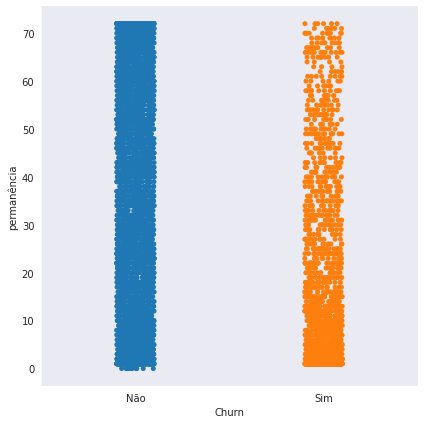

In [61]:
sns.catplot(x='Churn', y='permanência', data=clientes, size=6)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


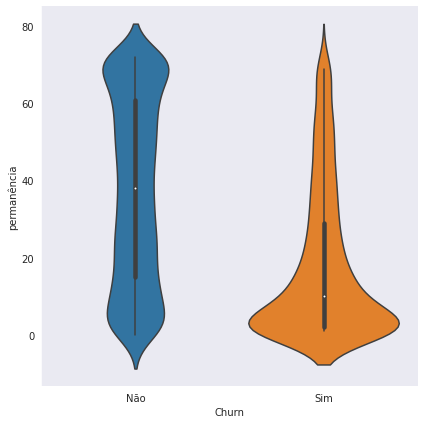

In [62]:
sns.catplot(x='Churn', y='permanência', data=clientes, size=6, kind ='violin')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


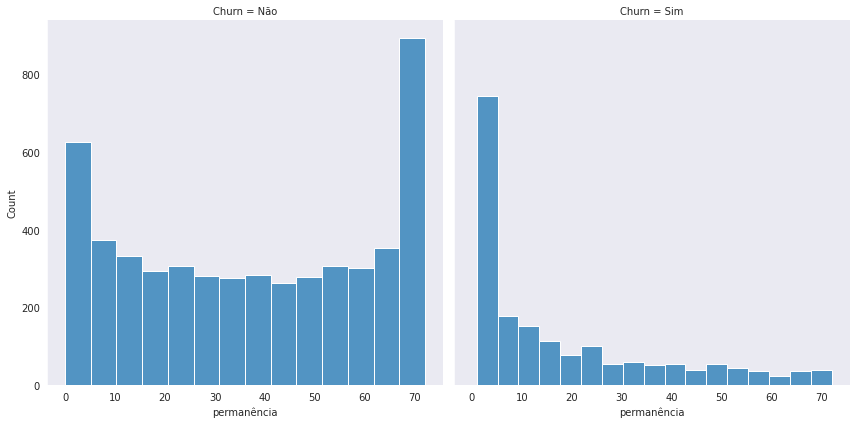

In [63]:
g = sns.FacetGrid(clientes, col='Churn', size=6)
g.map(sns.histplot, 'permanência')

In [64]:
permanencia_menos_10_meses = (clientes['permanência']<=10) & (clientes['Churn']=='Sim')
print(f'Nº de clientes que cancelaram com de 10 meses ou menos de contrato: {clientes[permanencia_menos_10_meses].shape[0]}')

Nº de clientes que cancelaram com de 10 meses ou menos de contrato: 968


In [65]:
permanencia_mais_10_meses = (clientes['permanência']>10) & (clientes['Churn']=='Sim')
print(f"Nº de clientes que cancelaram com mais de 10 meses contrato: {clientes[permanencia_mais_10_meses].shape[0]}")

Nº de clientes que cancelaram com mais de 10 meses contrato: 901


A duas coisas a serem analisadas quando comparamos o Churn com o tempo em que o cliente está na empresa, a primeira coisa a se ressaltada é que a um grande número de clientes que já permanece a um tempo relativamente longo como consumidor e também a um pico de clientes entrando, porém a outra a coisa á se ressaltar e que esse clientes novos tende a cancelar com maior facilidade, tendo visto que grande parte dos clientes cancelam com menos de 10 meses

# Analise : Churn x Gastos
Outro fator que pode ter grande influencia sobre o aumento da taxa de cancelamento são os gastos. 

## Gasto Mensal

O primeiro gasto a se analisado é o gasto mensal, e se pergunta o "quanto um clientes gasta por mês?" pode ser um fator relevante para o cancelamento e assim se torna uma pergunta bem natura a ser feita, pois o gasto mensal influencia diretamente no poder de compra do clientes fazendo assim ele questionar quais os serviços são necessários para ele.


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


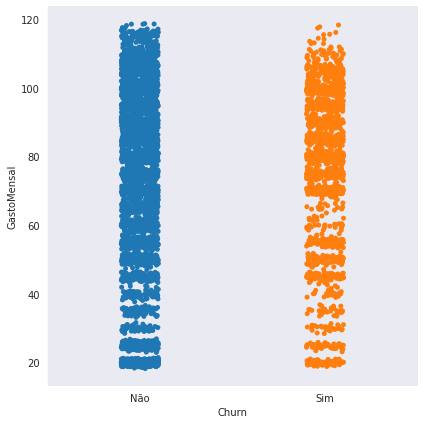

In [66]:
sns.catplot(x='Churn', y='GastoMensal', data=clientes, size=6)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


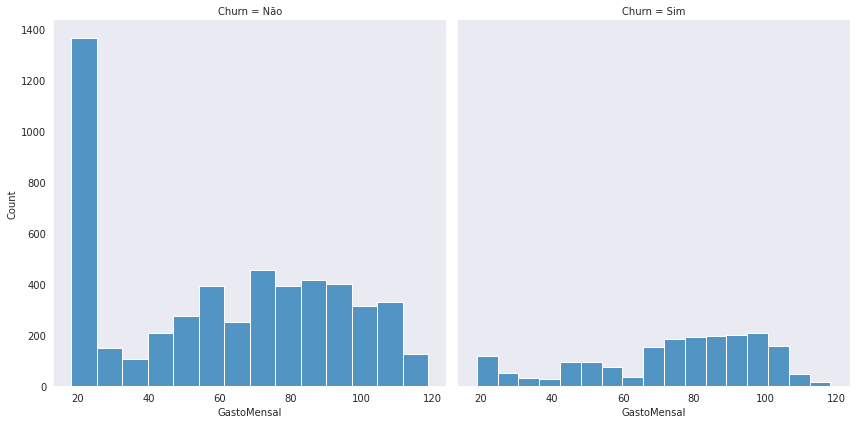

In [67]:
g = sns.FacetGrid(clientes, col='Churn', size=6, aspect=1)
g.map(sns.histplot, 'GastoMensal')

Text(0, 0.5, 'Churn')

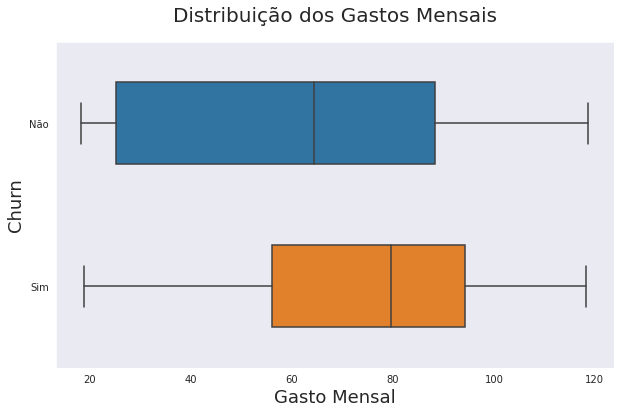

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(x='GastoMensal', y= 'Churn', data=clientes, orient='h', width= 0.5 ,ax = ax)
ax.set_title('Distribuição dos Gastos Mensais', fontsize=20, pad=20)
ax.set_xlabel('Gasto Mensal', fontsize=18)
ax.set_ylabel('Churn', fontsize=18)

É possível observar que dos valores pagos mensalmente que a maioria dos clientes que cancelaram tinham, geralmente, gastos mensais mais alto que os clientes que não cancelaram.

## Gasto Total

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


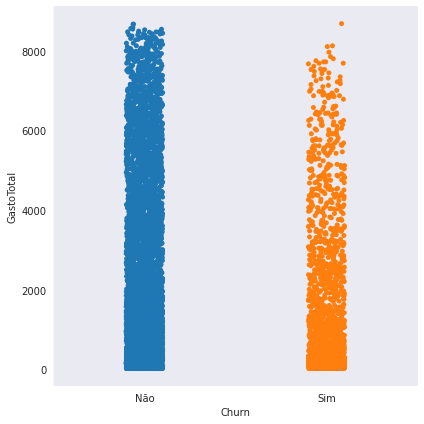

In [69]:
sns.catplot(x='Churn', y='GastoTotal', data=clientes, size=6)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


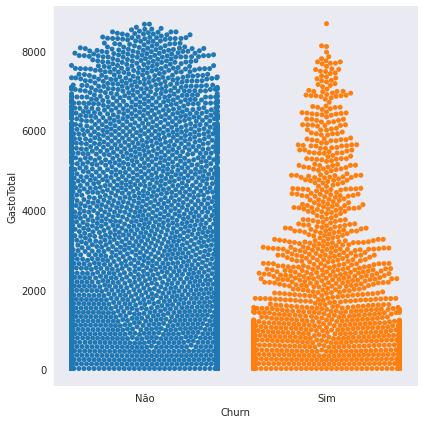

In [70]:
sns.catplot(x='Churn', y='GastoTotal', data=clientes, size=6, kind='swarm')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


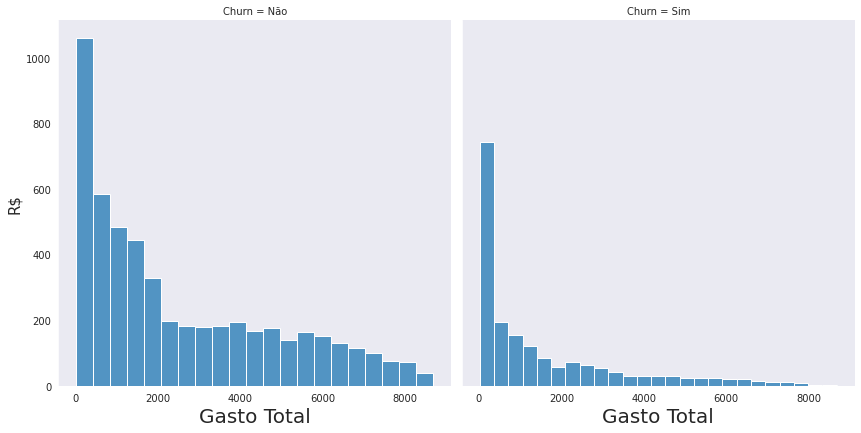

In [71]:
g = sns.FacetGrid(clientes, col='Churn', size=6)
g.map(sns.histplot, 'GastoTotal')
g.set_ylabels('R$', fontsize=15)
g.set_xlabels('Gasto Total', fontsize=20)

Text(0, 0.5, 'Churn')

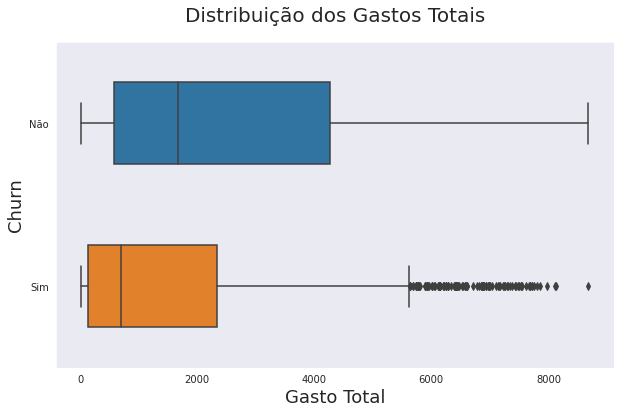

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(x='GastoTotal', y= 'Churn', data=clientes, orient='h', width= 0.5 ,ax = ax)
ax.set_title('Distribuição dos Gastos Totais', fontsize=20, pad=20)
ax.set_xlabel('Gasto Total', fontsize=18)
ax.set_ylabel('Churn', fontsize=18)

In [73]:
gastos_total_elevado = clientes[(clientes['GastoTotal']> 5000) & (clientes['Churn']=='Sim')]
gastos_total_elevado

,IDcustomizado,Churn,gênero,sênior,cônjuge,dependentes,permanência,ServicoTelefone,MultiplasLinhas,ServicoInternet,SeguroOnline,BackupOnline,ProtecaoDoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,contrato,FaturaSemPapel,MetodoPagamento,GastoDiario,GastoMensal,GastoTotal
113,0193-ESZXP,Sim,Mulher,1,Sim,Não,58,Sim,Não,Fibra Optica,Sim,Sim,Não,Sim,Sim,Sim,Um ano,Sim,Cartao de credito,3.52,105.50,6205.50
119,0201-OAMXR,Sim,Mulher,0,Não,Não,70,Sim,Sim,Fibra Optica,Sim,Sim,Sim,Sim,Sim,Sim,Um ano,Não,Cartao de credito,3.85,115.55,8127.60
179,0280-XJGEX,Sim,Homem,0,Não,Não,49,Sim,Sim,Fibra Optica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Transferencia bancaria,3.46,103.70,5036.30
199,0310-MVLET,Sim,Mulher,0,Sim,Sim,61,Sim,Sim,Fibra Optica,Não,Sim,Não,Não,Sim,Sim,Mensal,Sim,Cheque eletronico,3.30,99.15,6010.05
214,0324-BRPCJ,Sim,Mulher,1,Sim,Não,68,Sim,Sim,Fibra Optica,Não,Sim,Não,Não,Sim,Sim,Mensal,Sim,Cheque eletronico,3.34,100.20,6851.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6908,9518-RWHZL,Sim,Mulher,0,Não,Não,64,Sim,Sim,Fibra Optica,Não,Não,Sim,Não,Sim,Sim,Um ano,Sim,Cartao de credito,3.34,100.05,6254.20
6948,9572-MTILT,Sim,Homem,0,Sim,Não,59,Sim,Sim,Fibra Optica,Sim,Sim,Sim,Sim,Sim,Não,Mensal,Sim,Cheque eletronico,3.56,106.75,6252.90
6978,9614-RMGHA,Sim,Homem,0,Sim,Não,65,Sim,Sim,Fibra Optica,Não,Sim,Não,Não,Sim,Não,Mensal,Sim,Transferencia bancaria,3.06,91.85,5940.85
7013,9651-GTSAQ,Sim,Mulher,0,Sim,Não,53,Sim,Não,Fibra Optica,Sim,Sim,Sim,Não,Sim,Sim,Um ano,Sim,Transferencia bancaria,3.54,106.10,5769.75


In [74]:
gastos_total_elevado['permanência'].unique()

array([58, 70, 49, 61, 68, 59, 54, 60, 55, 69, 62, 67, 53, 72, 50, 63, 57,
       66, 48, 71, 64, 56, 65, 52, 47])

Quando se analisa os dois gastos pode se entender melhor que os clientes que cancelaram eram clientes que tinha gastos mensais altos e pouco tempo como clientes, ou seja, clientes novos e por isso os valores gasto no total era um valor relativamente baixo, porém como ficaram pouco tempo com cliente da empresa eles não tinham gastos muito altos no acumulado.

Outra ponto a se observado são os outliers, eles só aparecem porque alguns clientes que estavam a mais tempo na empresa e fizeram o cancelamento, mas como a grande maioria do que cancelaram estão concentrados no valores mais baixos esses clientes com mais tempo de permanência e custos maiores acabam extrapolando os valores do gráfico.


# Analise : Churn x Contrato 
O contrato é uma variável que precisa ser analisada juntamente a taxa de Churn, pois no processo de cancelamento é sempre importante saber as informações inicias do contrato para sejam feitas as cobranças devidas se assim as tiverem.


Text(0, 0.5, 'Quantidade de Churn')

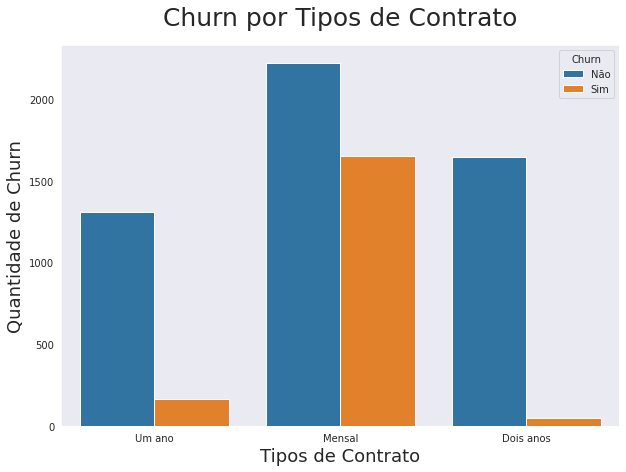

In [75]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='contrato',hue='Churn' ,data=clientes, ax=ax)
ax.set_title('Churn por Tipos de Contrato', fontsize=25, pad=20)
ax.set_xlabel('Tipos de Contrato', fontsize=18)
ax.set_ylabel('Quantidade de Churn', fontsize=18)

In [76]:
frequencia_churn_contrato = pd.crosstab(clientes['Churn'], clientes['contrato'])
frequencia_churn_contrato

contrato,Dois anos,Mensal,Um ano
Churn,,,
Não,1647,2220,1307
Sim,48,1655,166


É nítido a diferença em relação aos contratos, os clientes que fazem contratos mensais têm maior facilidade para cancelar seus contratos, tendo visto que mensalmente o processo é muito mais simples que nos planos anuais.

# Analise dos tipos de serviços

## Serviço Telefônico

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


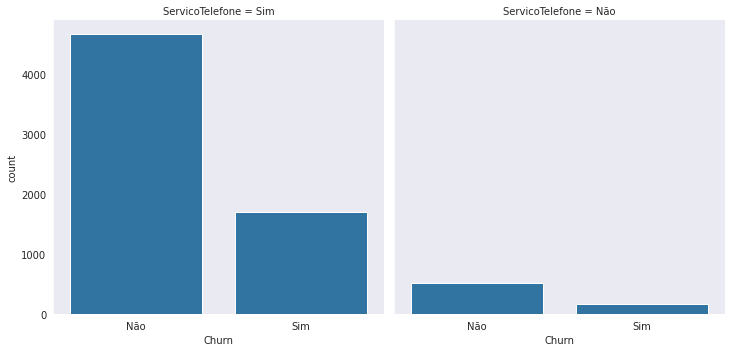

In [108]:
g = sns.FacetGrid(clientes, col='ServicoTelefone' ,height=5, col_wrap=3 )
g.map(sns.countplot, 'Churn')

## Multiplas Linhas

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


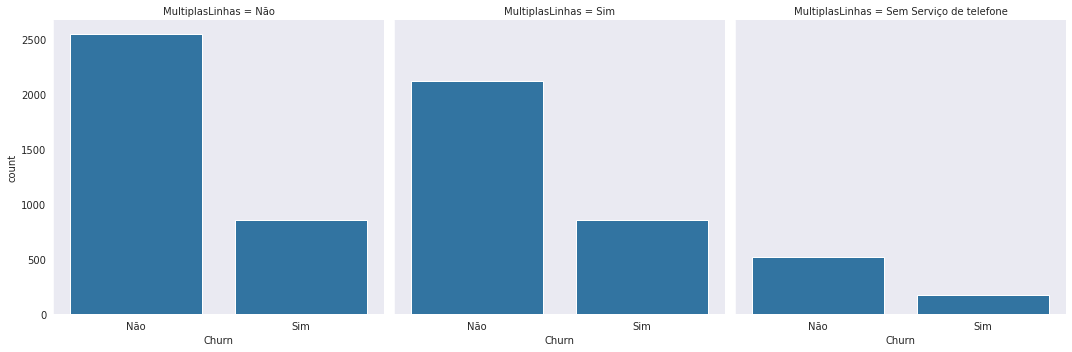

In [109]:
g = sns.FacetGrid(clientes, col='MultiplasLinhas' ,height=5, col_wrap=3 )
g.map(sns.countplot, 'Churn')

## Serviço de Internet

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


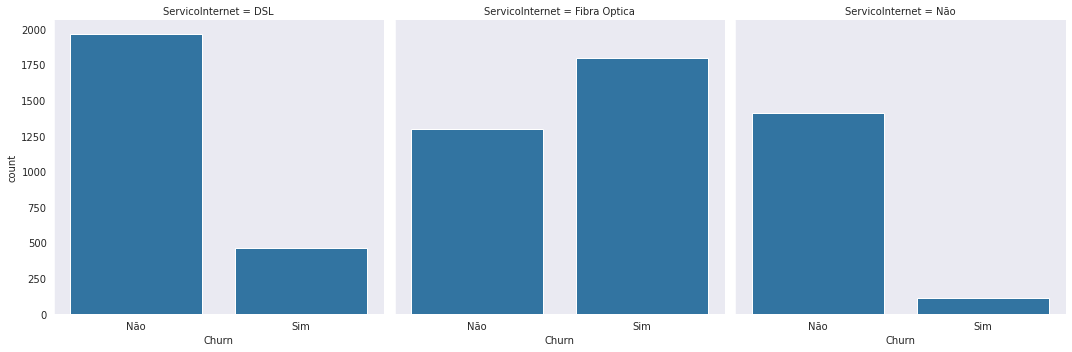

In [107]:
g = sns.FacetGrid(clientes, col='ServicoInternet', height=5, col_wrap=3)
g.map(sns.countplot, 'Churn')

In [119]:
churn_protecao = clientes[(clientes['ServicoInternet']=='Fibra Optica') & (clientes['Churn']=='Sim')].shape[0]
print(f'Um total de {churn_protecao} clientes que tinha o serviço de proteção do dispositivo cancelaram seus contratos')

Um total de 1297 clientes que tinha o serviço de proteção do dispositivo cancelaram seus contratos


Analisando os tipos de interenet fornecido para os clinetes e possivel observar que a maior taxa de Churn vem dos clientes que usam fibra optica como servido de internet prestado, sendo a taxa dos de mais bem mais baixa.

## Seguro Online

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


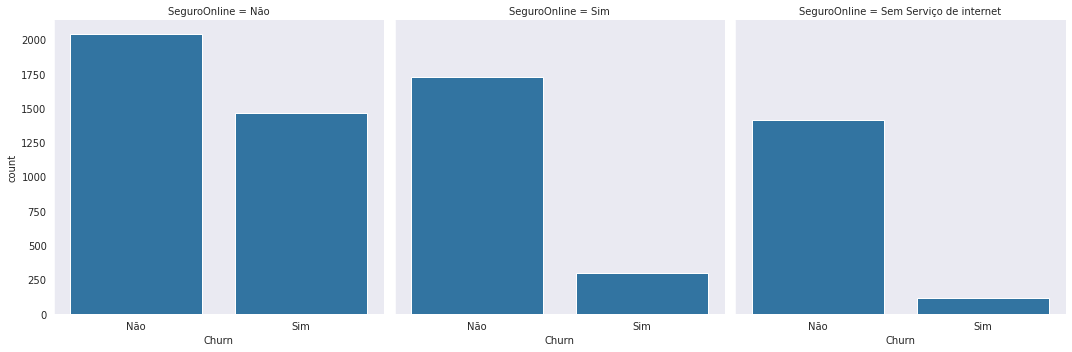

In [99]:
g = sns.FacetGrid(clientes, col='SeguroOnline' ,height=5, col_wrap=3 )
g.map(sns.countplot, 'Churn')

## Backup Online

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


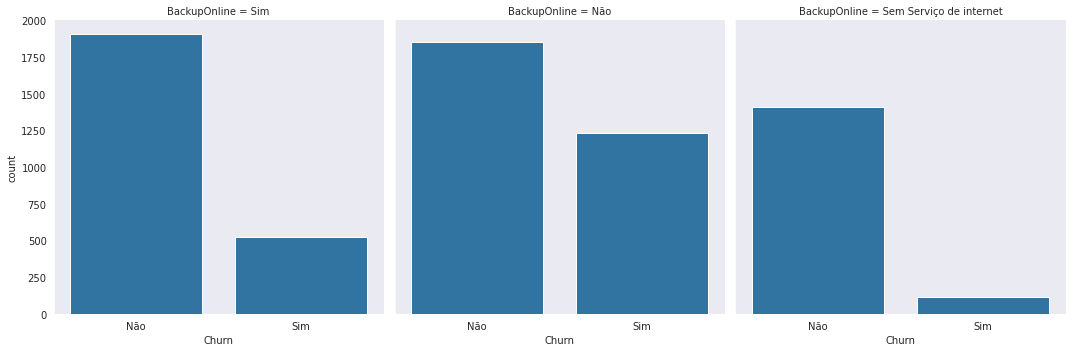

In [100]:
g = sns.FacetGrid(clientes, col='BackupOnline' ,height=5, col_wrap=3 )
g.map(sns.countplot, 'Churn')

## Protecao do Dispositivo

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


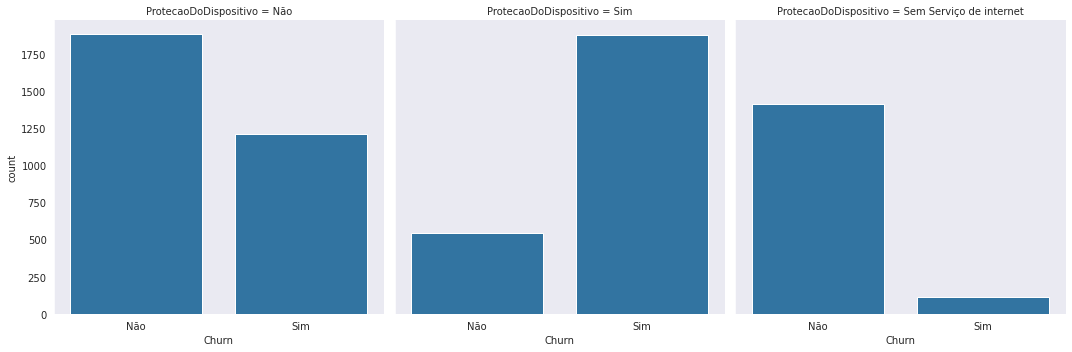

In [101]:
g = sns.FacetGrid(clientes, col='ProtecaoDoDispositivo' ,height=5, col_wrap=3 )
g.map(sns.countplot, 'Churn')

Outro serviço que tem alto índice de cancelamento é o de proteção do dispositivo.

In [117]:
churn_protecao = clientes[(clientes['ProtecaoDoDispositivo']=='Sim') & (clientes['Churn']=='Sim')].shape[0]
print(f'Um total de {churn_protecao} clientes que tinha o serviço de proteção do dispositivo cancelaram seus contratos')

Um total de 545 clientes que tinha o serviço de proteção do dispositivo cancelaram seus contratos


## Suporte Tecnico

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


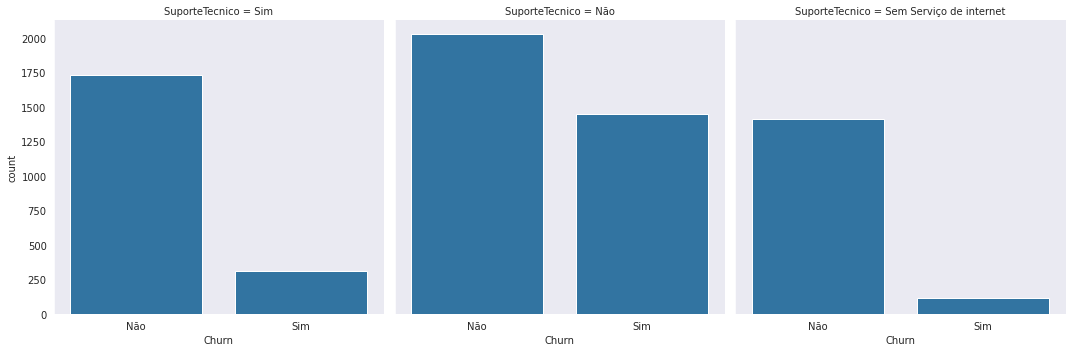

In [102]:
g = sns.FacetGrid(clientes, col='SuporteTecnico' ,height=5, col_wrap=3 )
g.map(sns.countplot, 'Churn')

## Streaming TV

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


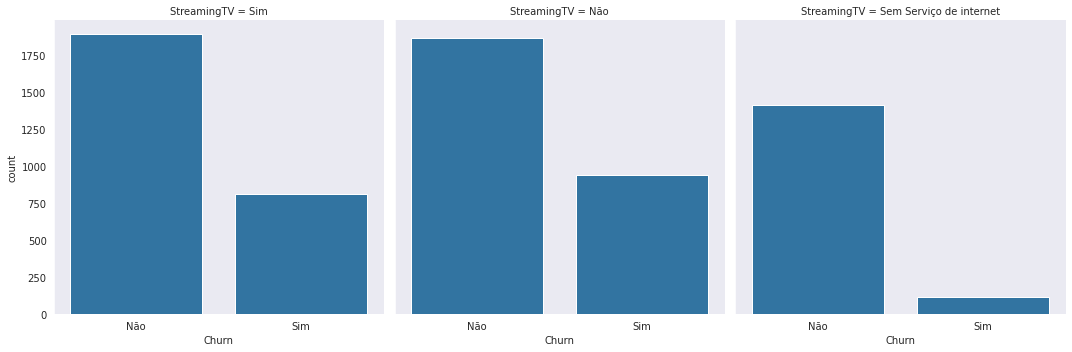

In [110]:
g = sns.FacetGrid(clientes, col='StreamingTV' ,height=5, col_wrap=3 )
g.map(sns.countplot, 'Churn')

## Streaming Filmes

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


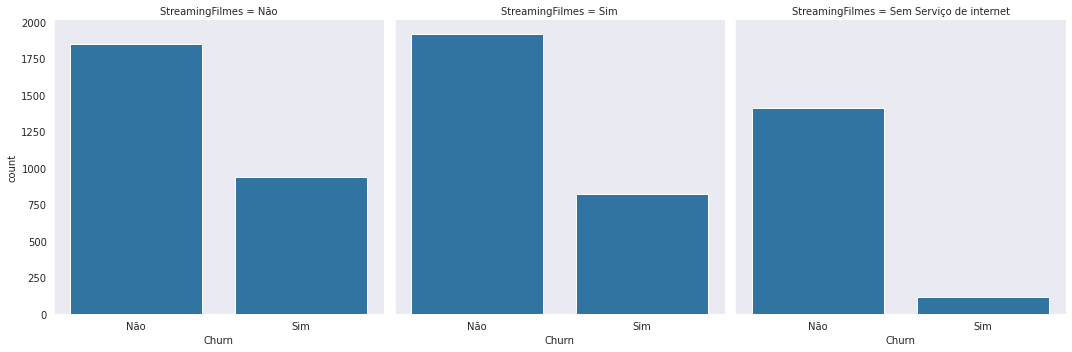

In [113]:
g = sns.FacetGrid(clientes, col='StreamingFilmes' ,height=5, col_wrap=3 )
g.map(sns.countplot, 'Churn')